In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Funciones para crear los datos y para dibujar

In [2]:
def rota_datos_alrededor_origen(X, angulo):
    angle_rad = angulo*2.0*np.pi/360.0

    s = np.sin(angle_rad)
    c = np.cos(angle_rad)
    matriz_rotacion = np.array([[c,-s],[s,c]])
    X_rotados = np.dot(matriz_rotacion, X) # se rotan los puntos generados

    return X_rotados

In [3]:
def genera_puntos_gausiana2D(Npuntos, media, var1, var2, angulo, display):
    X = np.random.randn(2, Npuntos)
    X[0,:] = X[0,:] * np.sqrt(var1) # se multiplica cada atributo por la
    X[1,:] = X[1,:] * np.sqrt(var2) # raiz cuadrada de la varianza deseada

    X = rota_datos_alrededor_origen(X, angulo)

    X[0,:] = media[0] + X[0,:]
    X[1,:] = media[1] + X[1,:]

    # Display
    if display:
        plt.figure(1)
        plt.plot(X[0,:],X[1,:],'bo',zorder=1)
        plt.grid(True)
        plt.axis('equal')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    return X

## Generación de los datos del problema:

In [4]:
# Number of samples per component:
n_samples = 200

# Generate random sample, three components:
X1 = genera_puntos_gausiana2D(n_samples, [0, 0], 1, 1, 45, False)
X2 = genera_puntos_gausiana2D(n_samples, [10, 0], 8, 1, 45, False)
X3 = genera_puntos_gausiana2D(n_samples, [5, 5], 4, 1, 0, False)
X = np.concatenate((X1, X2, X3), axis=1).transpose()
Y = np.array([0] * n_samples + [1] * n_samples + [2] * n_samples)

print(X.shape, Y.shape)

(600, 2) (600,)


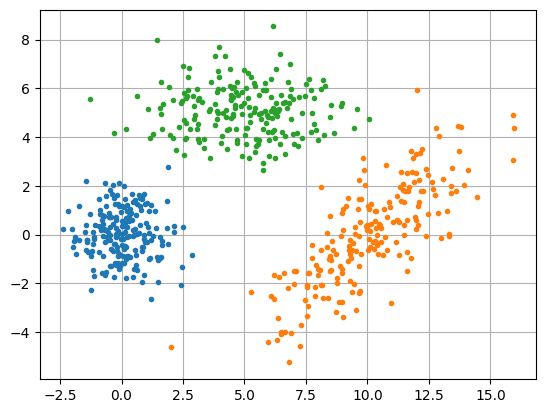

In [5]:
plt.figure()
for c in np.unique(Y):
  plt.plot(X[Y==c, 0], X[Y==c, 1], '.')
plt.grid(True)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Entrenamiento con NaiveBayes

In [7]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9916666666666667

In [8]:
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 0.1), np.arange(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 0.1))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

p = nb.predict_proba(xy)

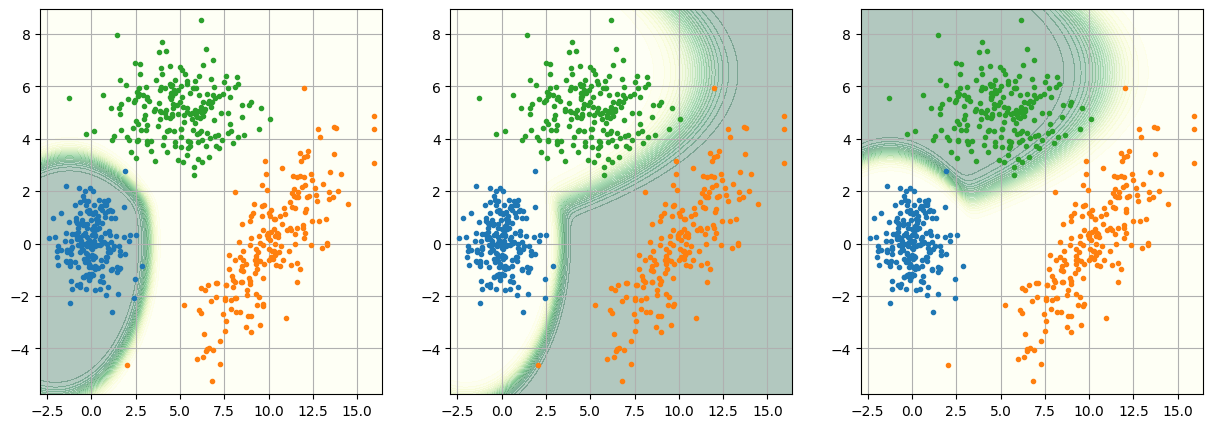

In [9]:
plt.figure(figsize=(15, 5))
for c in np.unique(Y):
  zz = p[:, c].reshape(xx.shape)
  levels = np.linspace(0, zz.max(), 25)

  plt.subplot(1,3,c+1)
  plt.contourf(xx, yy, zz, levels=levels, cmap="YlGn", alpha=0.3)
  for cl in np.unique(Y):
    plt.plot(X[Y==cl, 0], X[Y==cl, 1], '.')

  plt.grid()
plt.show()

# Problema del Iris

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df[::10].head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
50,7.0,3.2,4.7,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
80,5.5,2.4,3.8,1.1,versicolor
90,5.5,2.6,4.4,1.2,versicolor


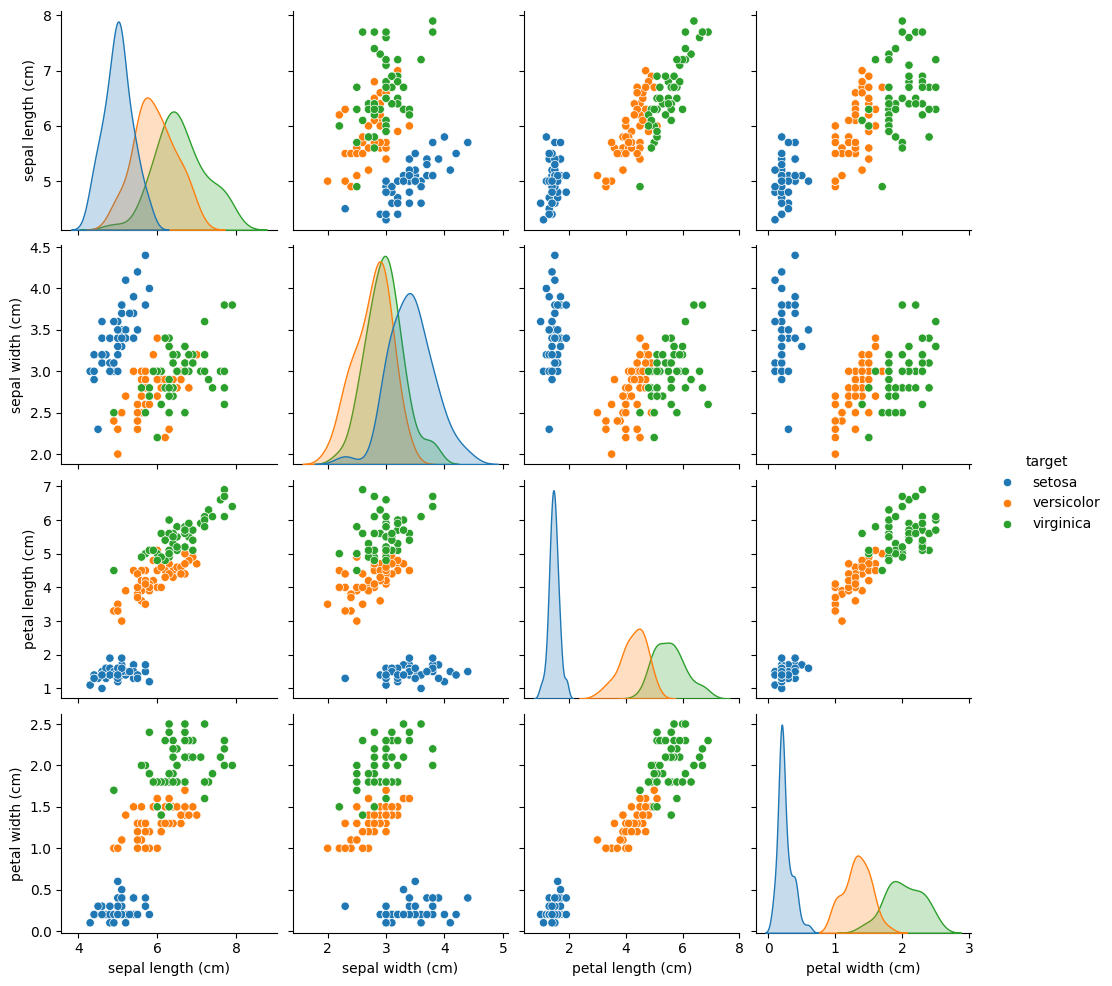

In [12]:
sns.pairplot(df, hue="target")

In [13]:
X = iris.data
Y = iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Entrenamiento con Naive Bayes

In [15]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

1.0

# Ejercicio

Naive Bayes es un buen modelo de clasificación. Sin embargo, tiene una serie de desventajas:

- Estamos suponiendo que todos los atributos tienen la misma relevancia.

- Estamos suponiendo que los atributos son independientes entre sí.

Diseña un problema donde Naive Bayes sea una mala elección. Compara los resultados con KNN y con un árbol de decisión.

## Naive Bayes

## KNN

## Árbol de decisión